In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
file_path = 'test.csv'

df = pd.read_csv(file_path)
df

,Context,Question,Temperature,Image_Path,Output,Actual
0,You are a pathologist examing cell imagery.,Identify the count of ecDNA. Return a numerica...,0.7,2244.png,1,0
1,You are a pathologist examing cell imagery.,Identify the count of ecDNA. Return a numerica...,0.7,949.png,10,2
2,You are a pathologist examing cell imagery.,Identify the count of ecDNA. Return a numerica...,0.7,1730.png,17,16
3,You are a pathologist examing cell imagery.,Identify the count of ecDNA. Return a numerica...,0.7,2153.png,8,9
4,You are a pathologist examing cell imagery.,Identify the count of ecDNA. Return a numerica...,0.7,998.png,4,0
...,...,...,...,...,...,...
12052,ecDNA is usually smaller than chromosomes or n...,Identify the count of ecDNA. Return a numerica...,0.7,276.png,10,17
12053,ecDNA is usually smaller than chromosomes or n...,Identify the count of ecDNA. Return a numerica...,0.7,972.png,5,0
12054,ecDNA is usually smaller than chromosomes or n...,Identify the count of ecDNA. Return a numerica...,0.7,500.png,20,15
12055,ecDNA is usually smaller than chromosomes or n...,Identify the count of ecDNA. Return a numerica...,0.7,1653.png,5,6


In [35]:
def is_integer(val):
    try:
        if float(val).is_integer():
            return float(val)  # Return the value as is if it's an integer
        else:
            return np.nan  # Return NaN if it's not an integer
    except ValueError:
        return np.nan  # Return NaN if it's not a number at all

df['Output'] = df['Output'].apply(is_integer)
df['Actual'] = df['Actual'].apply(is_integer)

In [36]:
print(df.iloc[0]['Question'])

Identify the count of ecDNA. Return a numerical answer only


In [39]:
def mse(group):
    return (abs(group['Output'] - group['Actual'])).mean()

# Group by Context, Question, and Temperature and apply the MSE function
mse_results = df.groupby(['Context', 'Question', 'Temperature']).apply(mse)

# Reset index to make the output cleaner
mse_results = mse_results.reset_index(name='MSE')

# Display the results
mse_results

/tmp/ipykernel_4471/1417334777.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse_results = df.groupby(['Context', 'Question', 'Temperature']).apply(mse)


,Context,Question,Temperature,MSE
0,Be extremely careful,Identify the count of ecDNA. Return a numerica...,0.1,10.264368
1,Be extremely careful,Identify the count of ecDNA. Return a numerica...,0.7,10.962072
2,You are a pathologist examing cell imagery.,Identify the count of ecDNA. Return a numerica...,0.7,10.328717
3,You are a pathologist examing cell imagery. ec...,Identify the count of ecDNA. Return a numerica...,0.7,11.219891
4,You must be professional,Identify the count of ecDNA. Return a numerica...,0.1,10.350307
5,You must be professional,Identify the count of ecDNA. Return a numerica...,0.7,11.206673
6,ecDNA is usually smaller than chromosomes or n...,Identify the count of ecDNA. Return a numerica...,0.1,10.509186
7,ecDNA is usually smaller than chromosomes or n...,Identify the count of ecDNA. Return a numerica...,0.7,11.673146


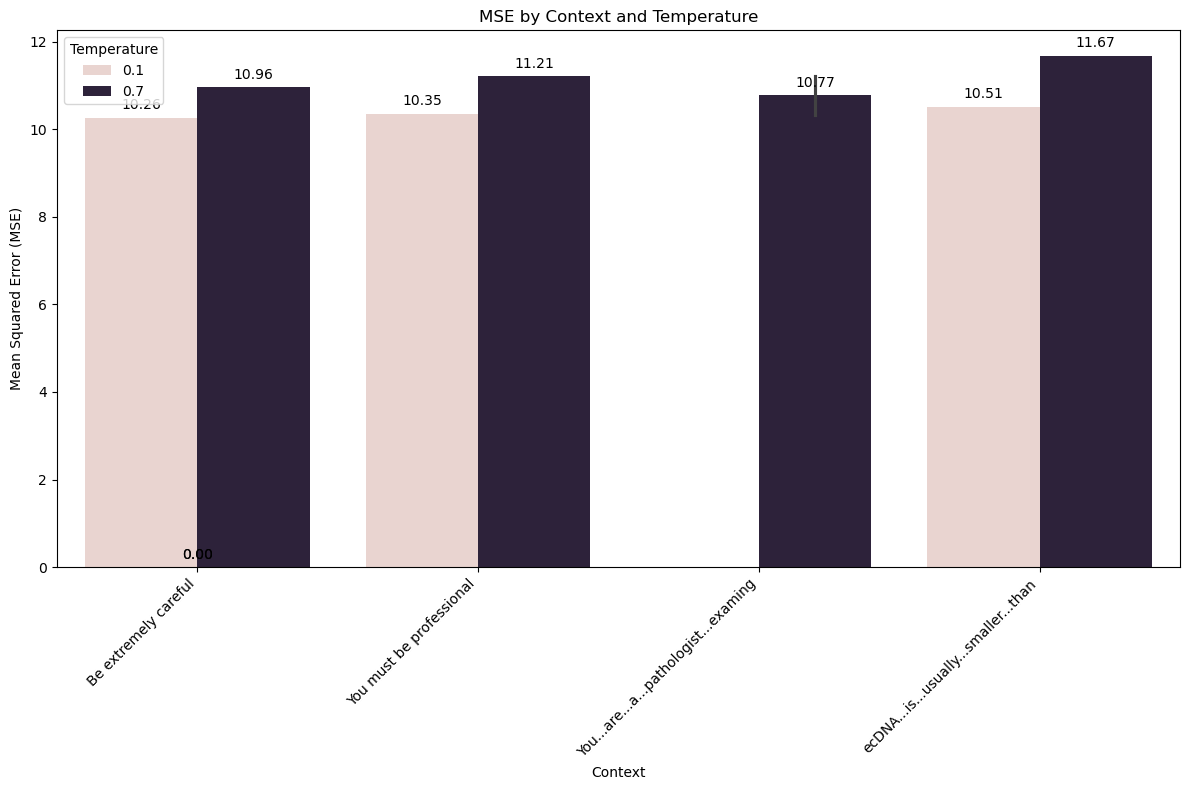

In [40]:
mse_results['Context'] = mse_results['Context'].apply(lambda x: '...'.join(x[:30].split()) if len(x) > 30 else x)
# Sort the DataFrame by Context and Temperature for consistent bar ordering
mse_results.sort_values(by=['Context', 'Temperature'], inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=mse_results, x='Context', y='MSE', hue='Temperature')

# Add labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xticks(rotation=45, ha='right')
plt.title('MSE by Context and Temperature')
plt.xlabel('Context')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(title='Temperature')

plt.tight_layout()
plt.show()